# Dynamic Programming

Dynamic Programming ermöglicht es Probleme in Laufzeiten, wie $\mathcal{O}(n^2)$ oder $\mathcal{O}(n^3)$, zu lösen, für die sonst exponentieller Aufwand nötig wäre. Das Wort _Programming_ steht hier für Optimierung (ähnlich wie bei Linear Programming). Das Wort Optimierung ist zutreffend, da mit Dynamic Porgamming Optimierungsprobleme gelöst werden können, also Probleme, bei denen ein Minimum bzw. Maximum gefunden werden soll.

Das Ziel dabei ist, ein großes Gesamtproblem in kleinere Teilprobleme zu teilen und die Lösung der Teilprobleme zu speichern. Anders formuliert tut man so, als hätte man die Lösung für ein Subproblem und nutzt dieses um ein nächst größeres Problem zu lösen. Es lässt sich also sagen: Dynamic Programming = Recursion + Guessing. Ein entscheidender Unterschied zu Divide and Conquer, wo auch Probleme in kleinere Teilprobleme geteilt werden, ist, dass die Teilprobleme sich überlappen. Dies macht es möglich, durch das Speichern der Lösungen einen sehr großen Gewinn bezüglich des Rechenaufwands zu erzielen.

Grundlegende Eigenschaften:

 - Das große Problem wird in Teilprobleme geteilt
 - Die optimale Lösung des Teilproblems wird genutzt um die optimale Lösung des größeren Problems zu finden
 - Die Optimalitätsbedingung (Principle of Optimality) muss gelten, d.h. die optimale Lösung des Gesamtproblems muss sich zqnagsläufig aus den optimalen Lösungen der Teilprobleme ergeben
 - Trade space for time - es wird zusätzlicher Speicherplatz investiert, um den Algorithmus deutlich zu beschleunigen


## Fibonacci

Ein Beispiel, für welches Dynamic Programming benutzt werden kann, sind die Fibonacci Zahlen. Es ist relativ einfach die Bildungsvorschrift anzugeben:

$$
fib(n) = \begin{cases}
    0, & \text{wenn $n=0$}. \\
    1, & \text{wenn $n=1$}. \\
    fib(n-1) + fib(n-2) & \text{sonst}.
\end{cases}
$$

Dies lässt sich auch schnell programmieren:

In [57]:
def naive_fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return naive_fib(n-1) + naive_fib(n-2)

print(list(map(naive_fib, list(range(1, 15)))))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


Analysiert man aber die Zeitkomplexität dieses Algorithmus, so muss man festellen, dass sich um einen exponentiellen Aufwand handelt (genau $\Theta(\phi^n)$), und das für ein Problem, das nicht sehr komplex zu sein scheint. Jedoch kann Dynamic Programming genutzt werden, um die Fibonacci Zahlen wesentlich schneller zu berechnen.

Die Grundidee besteht darin, jeden Wert nur einmal ausrechnen zu müssen. Wurde einmal der Wert einer Fibonacci Zahl, so wird er in einem Zwischenspeicher abgelegt und steht nun zur Verfügung, sobald dieser Wert wieder benötigt wird. Hierfür sollte eine Datenstruktur gewählt werden, mit der man in $\mathcal{O}(1)$ einen Wert in Abhängigkeit vom Key lesen kann. Hier bietet es sich an eine Hashmap, die vom Parameter $n$ auf $fib(n)$ abbildet, oder ein Array, bei dem die $n$-te Fibonacci Zahl am Index $n$ steht, zu nutzen. Bei dieser Variante handelt es sich um die Top-Down Version des Dynamic Programming-Ansatzes. Man spricht hier von Top-Down, da man zunächst versucht die Wurzel des Rekursionsbaums zu berechnen, dafür dann aber schrittweise den Baum runter in Richtung Blätter gehen muss, um die Fibonacci-Zahlen ausrechnen zu können.

Die Alternative ist es, einen Bottom-Up Algorithmus zu entwerfen, also einen Algorithmus, der bei einem Blatt des Rekursionsbaum anfängt und schrittweise die nächstgrößeren Werte berechnet. Bei den Fibonacci Zahlen ist der Bottom-Up Ansatz relativ intuitiv. Ausgehend von den bereits gegebenen Werten von $fib(0)=0$ und $fib(1)=1$ berechnet man in einer Schleife von 2 bis $n$ schrittweise den nächstgrößeren Wert. Da zur Berechnung einer Fibonacci Zahl, die zwei nächstkleineren Fibonacci Zahlen benötigt werden, ist sichergestellt, dass die nötigen Werte bereits vorliegen, da man in der Schleife von klein bis groß geht.

In beiden Fällen müssen $n$ Fibonacci Zahlen berechnet werden, deren Zeitaufwand lediglich bei $\mathcal{O}(1)$ liegt, da die Werte entweder schon vorliegen, bzw. sie beim Top-Down Ansatz vorliegen, sobald die Blätter des Rekursionsbaum erreicht sind. Somit ergibt sich insgesamt ein Zeitaufwand von $\mathcal{O}(n) \cdot \mathcal{O}(1) = \mathcal{O}(n)$.

## Lösen des 0/1 Rucksack-Problems durch Dynamic Programming

Um das 0/1 Rucksack Problem zu lösen kann Dynamic Programming benutzt werden. Die folgende rekursive Gleichung kann aufgestellt werden, während $i$ der letzte Gegenstand in der Gegenstandsliste ist und $K$ die maximale Kapazität (das maximale Gewicht), welcher der Rucksack tragen kann, ist.

$$value(i,k)=\begin{cases}
    0, & \text{wenn $i=0$}.\\
    value(i-1,k), & \text{wenn $i>0 \land w[i]>k$}.\\
    max(value(i-1,k), value(i-1,k-w[i]) + v[i]), & \text{sonst}.
  \end{cases}$$
  
Betrachtet man die Gegenstandsliste bis zum 0. Gegenstand, so ist der Wert, der vom Rucksack getragen werden kann, 0, da keine Gegenstände zur Verfügung stehen. Wenn ein Gegenstand verfügbar ist, aber nicht in den Rucksack reinpasst, der erreichbare Wert ist gleich dem Wert des gleichen Problems ohne genau diesen Gegenstand. Dies liegt daran, dass es zwischen einem Gegenstand, der nciht reinpasst und einem Gegenstand, der gar nicht existiert, keinen Unterschied gibt. Dadurch wird das gleiche Probleme mit $i-1$ als Lösung zurückgegeben. 
Passt der Gegenstand aber in den Rucksack, so muss eine Entscheidung getroffen werden. Eine Möglichkeit ist, den Gegenstand in den Rucksack zu legen. In diesem Fall ist der Maximalwert gleich der Summe des Wertes genau diesen Gegenstands und dem erreichbaren Wert eines kleineren Rucksacks, der die Größe der verbleibenden Kapazität hat (der Platz im Restrucksack). Die andere Möglichkeit ist, diesen Gegenstand nicht in den Rucksack zu legen. In diesem Fall ist der Wert, der von der Funktion zurückgegeben wird gleich der erreichbaren Wert mit $i-1$ Gegenständen, also $value(i-1,k)$. Die $max()$ Funktion wählt die bessere der beiden Optionen.

Ohne Dynamic Programming wäre dies ein Exponentialzeit-Algorithmus. $k$ kann als Konstante betrachtet werden und $i$ als die Problemgröße. Um den Wert eines Problems mit der Größe $i$ zu berechnen, muss bis zu zwei-mal (im sonst-Fall) der Wert eines Problems der Größe $i-1$ berechnet werden. Das heißt die Zeit zur Berechnung der Lösung verdoppelt sich mit jedem Inkrement von $i$, was zu einer exponentiellen Laufzeit führt. Dank Dynamic Programming kann dies beschleunigt werden. Anstatt das gleiche Problem immer neuzuberechnen, wird die Lösung in einem Dictionary mit einem 2-Tuple der Parameter als Key gespeichert. Nun kann in vielen Fällen, der Wert aus dem Dictionary in $\mathcal{O}(1)$ gelesen werden. Da jeder Wert nur einmal berechnet werden muss, ist die Zeit, um das große Gesamtproblem zu lösen, das Produkt aus der Anzahl der Teilprobleme und der Zeit pro Problem. Die Zahl der Teilprobleme ist maximal die Anzahl der möglichen Tuples mit den Werten $(1...n,0...K)$, also $\mathcal{O}(nK)$. Die Laufzeit des Problems ist $\mathcal{O}(nK) \cdot \mathcal{O}(1) = \mathcal{O}(nK)$.

In [58]:
K = 120 #Maximale Kapazität

items = [(13, 19), (11, 20), (17, 23), (15, 21), (16, 27), (14, 25), (18, 25), 
         (10, 18), (19, 24), (12, 17)] #Liste der Gewicht, Werte Paare aller Gegenstände

n = len(items) - 1 #Index des letzten Gegenstands

weights = []
values = []

calls = 0 #Globale Variable um alle Funktionsaufrufe zu zählen

for item in items:
    weights.append(item[0])
    values.append(item[1])


#memoize decorator
def memoize(f):
    memo = {}
    
    def helper(i, k):
        if (i, k) not in memo:
            memo[(i, k)] = f(i, k)
        return memo[(i, k)]
    
    return helper


@memoize
def value_memo(i, k):
    global calls
    calls += 1
    
    if i < 0:
        return 0
    if weights[i] > k:
        return value_memo(i - 1, k)
    return max(value_memo(i - 1, k), value_memo(i - 1, k - weights[i]) + values[i])


def value(i, k):
    global calls
    calls += 1
    
    if i < 0:
        return 0
    if weights[i] > k:
        return value(i - 1, k)
    return max(value(i - 1, k), value(i - 1, k - weights[i]) + values[i])


print('Mit Memoization:')
print('Ergebnis: ' + str(value_memo(n, K)))
print('Funktionsaufrufe: ' + str(calls))
calls = 0
print()
print('Ohne Memoization:')
print('Ergebnis: ' + str(value(n, K)))
print('Funktionsaufrufe: ' + str(calls))

Mit Memoization:
Ergebnis: 183
Funktionsaufrufe: 502

Ohne Memoization:
Ergebnis: 183
Funktionsaufrufe: 2026


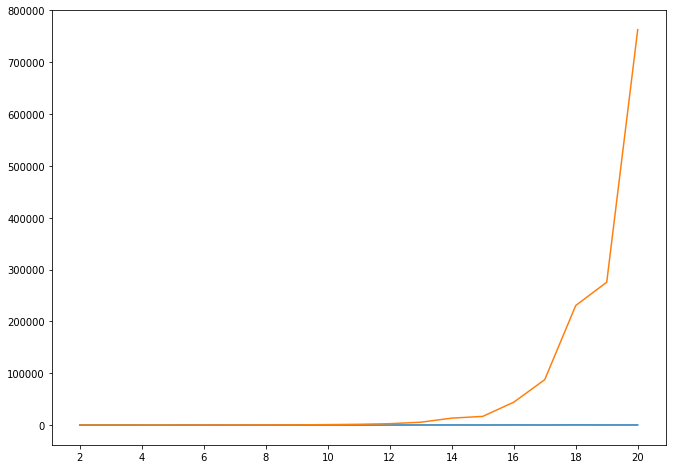

In [59]:
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np


def rand_items(n):
    items = []
    for i in range(0, n):
        items.append((rnd.randint(1, 100), rnd.randint(1, 100)))
    return items


calls_with_memo = []
calls_without_memo = []

for i in range(2, 21):
    calls1 = 0
    calls2 = 0
    
    for j in range(0, 5):
        K = 20 * i
        items = rand_items(i)
        n = len(items) - 1
        global weights
        weights = []
        global values
        values = []
        global calls
        calls = 0
        for item in items:
            weights.append(item[0])
            values.append(item[1])
        value_memo(n, K)
        calls1 += calls
        calls = 0
        value(n, K)
        calls2 += calls
        calls = 0
    calls_with_memo.append(calls1 / 5)
    calls_without_memo.append(calls2 / 5)
    
   
   
x = np.arange(2, 21)
y1 = np.asarray(calls_with_memo)
y2 = np.asarray(calls_without_memo)
    
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x, y1)
ax1.plot(x, y2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()